![20220715132147](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220715132147.png)

![20220715132250](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220715132250.png)

## K-means

通过把样本分离成 n 个`具有相同方差的类`的方式来聚集数据，`基于距离`的模型。

算法目标--确定K，并最小化簇内平方和

![20220715133333](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220715133333.png)

1. 选取K个质心；
2. 将每个样本分配到其最近的质心；
3. 通过分配给每个质心的所有样本的平均值来创建新的质心。计算旧的和新的质心之间的差异，直到该值小于阈值（质心不再显著移动）

所以，`K-means对于圆形区域的聚类效果更好`，因为是基于均值不断更新质心，如果不是圆形区域，则可考虑基于分布的高斯混合进行聚类。

In [1]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

# 默认 k-means++ 
kmeans = KMeans(n_clusters=2, random_state=0,init='k-means++').fit(X)
# 每个数据点所属类
print(kmeans.labels_) # 或者直接 kmeans.fit_predict(X)
print(kmeans.predict([[0, 0], [12, 3]]))
# 聚类中心
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


## Mini Batch K-Means

在聚类样本数据量非常大的时候，kmeans每次迭代更新簇内中心（需计算每个样本与其簇内中心的距离），计算量非常大很耗时，所以才有了mini batch kmeans。

mini-batch 指的是小批量，通过`小批量数据来减少计算时间`，优化同一个目标函数。在每次训练迭代中随机取样，小批次极大地减少收敛到一个局部最优所需的计算量，代价就是比正常的Kmeans效果差一点点。

该算法在每次迭代中随机选择数据集的小批次。批次中的每个数据都被分配到聚类中，取决于聚类中心点的先前位置。然后，它`根据该批数据中的新点来更新集群中心点的位置`。该更新是一个梯度下降更新(有一个随着迭代次数减少的学习率)，它比普通的批量K-Means更新要快得多。

'a random batch of data is collected on each iteration to update the clusters.'

C:\Users\Ceallach_Shaw\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


   median_income  latitude  longitude  Cluster
0         8.3252     37.88    -122.23        3
1         8.3014     37.86    -122.22        3
2         7.2574     37.85    -122.24        5
3         5.6431     37.85    -122.25        5
4         3.8462     37.85    -122.25        5


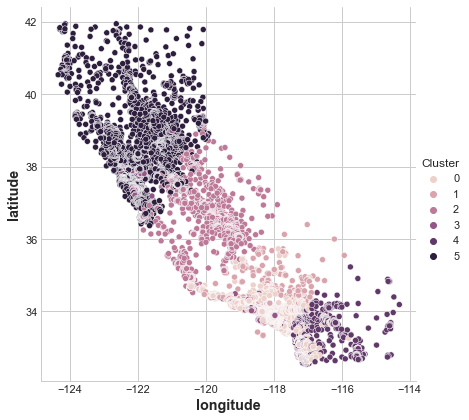

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import MiniBatchKMeans

data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
data = data.loc[:, ["median_income", "latitude", "longitude"]]

kmeans = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")
print(data.head())


plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=data, height=6)
plt.show()

## 亲和传播 -- Affinity Propagation

亲和传播是一种无监督的机器学习算法，`特别适合于不知道最佳聚类数量的问题`。

https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8

In [3]:
from sklearn.cluster import AffinityPropagation
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

clustering = AffinityPropagation(random_state=5).fit(X)

print(clustering.labels_)

print(clustering.predict([[0, 0], [4, 4]]))

print(clustering.cluster_centers_)

[0 0 0 1 1 1]
[0 1]
[[1 2]
 [4 2]]


## 均值转换 -- Mean Shift

给定一组数据点，`该算法迭代地将每个数据点分配给最接近的聚类中心点，而通往最接近的聚类中心点的方向由附近大多数点的位置决定`（mode search）。因此，每次迭代后，每个数据点都会向大多数点所在的位置靠近。

与流行的K-Means聚类算法不同，均值转换`不需要事先指定聚类的数量`，聚类的数量是`由算法针对数据决定的`。Mean-shift算法在图像处理和计算机视觉领域有应用。该算法的优势在于，它为数据分配聚类，而不需要根据定义的带宽自动定义聚类的数量。

算法步骤：
1. 核密度估计（KDE）
   在数据集的每个点上放置一个核（一般是高斯核），将所有单独的核加起来，就会产生一个概率面密度函数。由此产生的密度函数的变化取决于所使用的带宽参数。
   
   ![20220717224552](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220717224552.png)

2. 模式搜索
   - 初始化随机种子和窗口W(也就是bandwidth 带宽，计算平均值的 "窗口 "的大小)
   - 计算W的平均值
   - 将搜索窗口移至平均值
   - 重复步骤2，直到收敛
  
   ![20220717224937](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220717224937.png)

   小的内核带宽使KDE表面保持每个数据点的峰值，即每个点都有它的簇类；另一方面，大的内核带宽导致更少的内核或更少的簇类。
  

In [7]:
from sklearn.cluster import MeanShift
import numpy as np

X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])

clustering = MeanShift(bandwidth=2).fit(X)

print(clustering.labels_)
print(clustering.predict([[0, 0], [5, 5]]))
print(clustering)

[1 1 1 0 0 0]
[1 0]
MeanShift(bandwidth=2)


## 谱系聚类 -- Spectral clustering